## EDA

Import Necessary Modules

In [12]:
import sys, os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocessing import filtering_specific_products, clean_narrative


Load Data

In [13]:
df = pd.read_csv('../data/raw/complaints.csv')
df.head()

C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_7540\391738598.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [14]:
df.isna().sum() # checking null values

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

Number of Complaints based on Product

In [15]:
complaint_by_product = df.groupby('Product')['Complaint ID'].count().sort_values(ascending=False)
print("\nTotal Complaints per Product:")
print(complaint_by_product)


Total Complaints per Product:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                          

Visualizing Consumer Complaint Narrative based on Word Count

In [16]:
df = df[df['Consumer complaint narrative'].notnull()].copy() # filtering non-null values


In [17]:
# Calculate word count
df['word_count'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

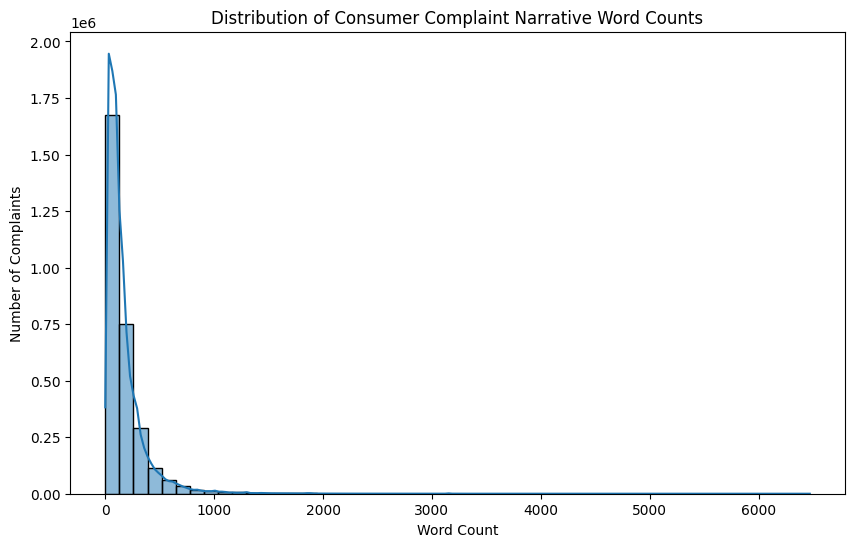

In [18]:
# Histogram to see general distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution of Consumer Complaint Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Complaints')
plt.show()

Number of Complaints based on existence of Narratives

In [19]:
# Count complaints with narratives (non-null values)
with_narrative = df['Consumer complaint narrative'].count()

# Count complaints without narratives (null values)
without_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f"Complaints with narratives: {with_narrative}")
print(f"Complaints without narratives: {without_narrative}")

Complaints with narratives: 2980756
Complaints without narratives: 0


## Preprocessing

In [20]:
filtered_df = filtering_specific_products(df)
print("Dataframe after filtering : ")
filtered_df.head()

Dataframe after filtering : 


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,word_count
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170


In [23]:
# Checking the products under the filtered dataframe

complaint_by_product_filtered = filtered_df.groupby('Product')['Complaint ID'].count().sort_values(ascending=False)
print("\nTotal Complaints per Product after filtering:")
print(complaint_by_product_filtered)


Total Complaints per Product after filtering:
Product
Credit card        80667
Money transfers     1497
Name: Complaint ID, dtype: int64


In [24]:
filtered_df['cleaned_text'] = filtered_df['Consumer complaint narrative'].apply(clean_narrative)

In [28]:
filtered_df.isna().sum()

Date received                       0
Product                             0
Sub-product                     18837
Issue                               0
Sub-issue                       20394
Consumer complaint narrative        0
Company public response         42598
Company                             0
State                             307
ZIP code                            0
Tags                            67275
Consumer consent provided?          0
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              61830
Complaint ID                        0
word_count                          0
cleaned_text                        0
dtype: int64

In [22]:
filtered_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,word_count,cleaned_text
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91,a xxxx xxxx card was opened under my name by a...
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156,dear cfpb i have a secured credit card with ci...
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233,i have a citi rewards cards the credit balance...
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454,bi am writing to dispute the following charges...
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170,although the account had been deemed closed i ...


In [29]:
# Saving the filtered dataframe
filtered_df.to_csv('../data/processed/filtered_complaints.csv')